<center><strong><h1 style="color:#6D21FF;">Árboles de decisión: Clasificación</h1></strong></center>
<center><strong><h3 style="color:black;"> Universidad Nacional de Colombia </h3></strong></center>
<center><strong><h5 style="color:black;"> Andrés Stiven Gárcia López </h5></strong></center>
<center><strong><h5 style="color:black;"> Brayan Steven Peña Delgadillo  </h5></strong></center>


<img src="Simple_decision_tree.svg.png">

Fuente:[Eviatar Bach](https://commons.wikimedia.org/wiki/File:Simple_decision_tree.svg ),[Creative Commons Zero, Public Domain Dedication via Wikimedia Commons](https://creativecommons.org/publicdomain/zero/1.0/deed.en ), via Wikimedia Commons.



<right><strong><h1 style="color:#6D21FF;">Referencias.</h1></strong></right>
1. [scikit learn- Árboles de decisión](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms ).
2. [codificandobits- Clasificación con Árboles de Decisión: el algoritmo CART ](https://www.codificandobits.com/blog/clasificacion-arboles-decision-algoritmo-cart/)
3. [Datapeaker- Poda de complejidad de costos en árboles de decisión ](https://datapeaker.com/big-data/tipos-de-datos-en-estadisticas-datos-cualitativos-vs-cuantitativos/)
4. [Rocio Chavez ciencia de datos- Arboles de decision con phyton ](https://www.youtube.com/watch?v=6t2g5mUvQlM&ab_channel=RocioChavezCienciadeDatos)

<right><strong><h1 style="color:#6D21FF;">Introducción.</h1></strong></right>

Los árboles de decisión son una herramienta  muy intuitiva y sencilla para poder clasificar conjuntos de datos relativamente complejos pues codifican los datos según una serie de elecciones del tipo "**si el dato cumple con algunas caracteristicas, entonces: ___**" y "**si no cumple con aquellas caracteristica, entonces: ____**", de forma muy similar a como una persona tomaría una decisión, o un programa simple usando las estructuras **`if`** y **`else`**.

Son además un metodo de aprendizaje no supervisado no parametrico comunmente utilizado para la regresion, en este cuaderno nos enfocaremos principalmente en la clasificación y algúnos algoritmos para dicho fin, Lo que buscamos es entrenar un modelo con ayuda de algunos datos que permita introducir un dato especifico en una categoria.

## Ejemplo:
Un ejemplo sencillo y común es la claificación entre correos normales y correso de spam.




<right><strong><h1 style="color:#6D21FF;">Ventajas y desventajas.</h1></strong></right>
Como muchos de los algoritmos y metodos Existentes estos pueden ser más funcionales en algunos casos que en otros, por lo tanto mencionaremos algunas de las ventajas y desventajas presentes en este metodo.

**Ventajas**
* Es facil de comprender y de interpretar en comparacino a otras formas de clasificacion como por ejemplo, las redes neuronales, ademas su visualización es sencilla e intuitiva. 
* Los datos no requieren una preparacion anterior como otros modelos que pueden requerir normalizacion, eliminacion de datos en blanco entre otros, aunque se debe tener en cuenta que este metodo no permite datos faltantes.
* El costo computacional del uso del árbol para predecir la categoría de un ejemplo es mínimo comparado con otras técnicas (se realiza en tiempo logarítmico).
* Capaz de manejar datos numéricos y categóricos.
* Posibilidad de validar un modelo mediante pruebas estadísticas. Eso permite dar cuenta de la fiabilidad del modelo.
* Tiene un buen desempeño incluso si sus supuestos son algo violados por el verdadero modelo a partir del cual se generaron los datos.

**Desventajas**

* En ocasiones, si el diseñador del árbol de decisión utiliza muchos caminos de decision con el fin de "ser muy preciso", puede generar sobre ajustes, para evitar este problema  son necesarios mecanismos como la poda, establecer el número mínimo de muestras requeridas en un nudo de la hoja o establecer la profundidad máxima del árbol, esto se abordara de manera más precisa mas adelante.
* Son muy sensibles al desbalance de clases (**sesgo**).
*Los árboles de decisión pueden ser inestables porque pequeñas variaciones en los datos pueden generar un árbol completamente diferente. Este problema se mitiga mediante el uso de árboles de decisión dentro de un conjunto.
*Las predicciones de los árboles de decisión no son uniformes ni continuas, sino aproximaciones constantes por partes, como se ve en la figura anterior. Por lo tanto, no son buenos para la extrapolación.
* Los aprendices de árboles de decisión crean árboles sesgados si dominan algunas clases. Por lo tanto, se recomienda equilibrar el conjunto de datos antes de ajustarlo al árbol de decisión.



<right><strong><h1 style="color:#6D21FF;">Un primer ejemplo.</h1></strong></right>
Antes de entrar a observar el modelo matematico detras de los arboles de decisión, se hará un pequeño ejemplo sobre como se realiza la clasificación utilizando este metodo (más especificamente con el algoritmo CART, uno de los más utilizados, de igual manera este algoritmo se describirá de manera mas prescisa posteriormente).

Supongamos que se tiene interes en clasificar entre dos clases de guerreros que pertenecen a dos bandos distintos (A y B), ademas supondremos que tienen dos caracteristicas principales, el nivel de fuerza y el nivel de letalidad, que tendran valores de 0 a 20.
Los guerreros del bando A seran representados con puntos rojos, mientras que los pertenecientes al bando B serán representado con puntos rojos. En primer lugar estos se colocaran en un plano donde el eje $x_0$ representa la fuerza y el eje $x_1$ la leatilad. De esta manera:

<img src="1.png">

El objetivo principal de este metodo es generar iterativamente particiones binarias, teniendo en cuenta las caracteristicas (en este caso son 2 Letalidad y nivel de fuerza, por simplicidad se utilizan estas dos, pero puede tenerse el caso en que se tengan muchas más caracteristicas), en la región de interes, con el fin de observar los subgrupos, estos los observamos en la ilustración en la parte izquierda.
Tambien se observa que este proceso se puede ver con un árbol de decisián gráfico como el que se ve en la parte derecha de la ilustración.

<img src="2.png">

<right><strong><h1 style="color:#6D21FF;">Partes principales de un árbol de decisión.</h1></strong></right>
1. **Raíz**: Es el punto de partida del árbol y contiene la primera condición binaria
2. **Nodos internos**: Son otros nodos posteriores que nos permiten seguir realizando las particiones binarias.
3. **Hojas**: Corresponden a las subregiones de las cuales no se haran más particiones
4. **Profundidad del árbol**: Hace referencia a la trayectoria más larga entre la raiz y una hoja.

<img src="3.png">

Este ejemplo fue adpatado y las imagenes tomadas de codificandobits [2]

<right><strong><h1 style="color:#6D21FF;">Nota histórica.</h1></strong></right>
* Los primeros métodos de regresión de árbol de decisión se inventan en **1963** en el proyecto AID(automatic interaction Detection) de Sonquist, Baker y Morgan.
* el Instituto de Ciencias de la Computación de la Universidad Tecnológica de Poznań afirma que una de las primeras publicaciones sobre el modelo de árbol de decisión fue en **1966** por Hunt, Martin y Stone al modelar el concepto humano de aprendizaje, descubrieron que el algoritmo del árbol de decisión era útil para la programación.
* El primer árbol de clasificación apareció en **1972** en el proyecto THAID por Messenger y Mandell, el cual funciona a través de la división de datos para maximizar la suma de casos en la categoría modal.
* En **1974** Breiman, Stone, Friedman y Olshen comenzaron a desarrollar el algoritmo del árbol de clasificación y regresión CART (Classification And Regression Tree).
* En **1980** Kass desarrolla un algoritmo recursivo de clasificación no binario, denominado CHAID (Chi Square Automatic Interaction Detection).
* En **1986** John Ross Quinlan propone un nuevo concepto (árboles con múltiples respuestas), ID3 (Iterative Dichitamizer 3) un algoritmo greedy de Quinlan que prefiere arboles sencillos frente a arboles más complejos, usando un criterio de impureza llamado relación de ganancia.
* En **1989** Utgoff crea ID5R para Machine Learning con inducción incremental de árboles de decisión. En 1990 Van de Velde implementa IDL para el tema de inducción incremental de árboles topológicamente mínimos.
* En **1992** Agrawal y otros autores utilizan IC, un algoritmo clasificador de intervalos para aplicaciones de minería de bases de datos.
* En **1997**, Loh  publica el algoritmo GUIDE que continua basandose en pruebas de significancia en el paso de dividir un nodo, Loh junto a Shih crean el  primer algoritmo sin tener sesgo de selección QUEST (Quick, Unbiased andEfficient Statistical Tree),

# 2. Nota histórica.

La inducción de un árbol de decisión óptimo a partir de datos dados se considera una tarea difícil. Se ha demostrado que encontrar un árbol de decisión mínimo consistente con el conjunto de entrenamiento es NP-difícil (Hancock et al., 1996). Además, se ha demostrado que la construcción de un árbol binario mínimo con respecto al número esperado de pruebas requeridas para clasificar una instancia no vista es NP completa (Hyafil y Rivest, 1976). Incluso encontrar el árbol de decisión equivalente mínimo para un árbol de decisión dado (Zantema y Bodlaender, 2000) o construir el árbol de decisión óptimo a partir de tablas de decisión es NP-difícil (Naumov, 1991)


<u><img >
</img></u>
Los primeros método de regresión de árbol de decisiones se inventó en 1963 en el proyecto AID (Automatic Interaction Detection) de Sonquist, Baker y Morgan, en cual tenían una medida de impureza  y dividió recursivamente los datos en dos subconjuntos. En 1966 el Instituto de Ciencias de la Computación de la Universidad Tecnológica de Poznań afirma que una de las primeras publicaciones sobre el modelo de árbol de decisión fue en 1966 por Hunt, Martin y Stone al modelar el concepto humano de aprendizaje, descubrieron que el algoritmo del árbol de decisión era útil para la programación. El primer árbol de clasificación apareció en 1972 en el proyecto THAID por Messenger y Mandell, el cual funciona a través de la división de datos para maximizar la suma de casos en la categoría modal. En 1974 Breiman, Stone, Friedman y Olshen comenzaron a desarrollar el algoritmo del árbol de clasificación y regresión CART (Classification And Regression Tree), el cual se publicó la primera versión en 1977 y oficialmente en 1984 con un software de árbol de decisión CART. En 1980 Kass desarrolla un algoritmo recursivo de clasificación no binario, denominado CHAID (Chi Square Automatic Interaction Detection), el cual Magidson en 1993 utiliza un  enfoque CHAID para el modelado de segmentación. En 1986 John Ross Quinlan propone un nuevo concepto (árboles con múltiples respuestas), ID3 (Iterative Dichitamizer 3) un algoritmo greedy de Quinlan que prefiere arboles sencillos frente a arboles más complejos, usando un criterio de impureza llamado relación de ganancia. ID3 no era ideal, por lo que su autor continuó actualizando la estructura del algoritmo creando el algoritmo C4.5 para el año 1993. Schlimmer y Fisher desarrolla el ID4 en un estudio de caso de inducción de concepto incremental. En 1987 Cestnik, Kononenko y Bratko desarrola ASSISTANT, una herramienta de licitación de conocimiento para usuarios sofisticados,  el cual es derivado de ID3 que construye arboles de decisión
binarios y permite manejar atributos con valores continuos (reales). En 1988 Loh y Vanichsetakul desarrollan FACT para la clasificación estructurada en árbol a través del análisis discriminante generalizado (con discusión). En 1989 Utgoff crea ID5R para Machine Learning con inducción incremental de árboles de decisión. En 1990 Van de Velde implementa IDL para el tema de inducción incremental de árboles topológicamente mínimos. En 1992 Agrawal y otros autores utilizan IC, un algoritmo clasificador de intervalos para aplicaciones de minería de bases de datos. En 1995 Mehta, et al. desarrollan un clasificador escalable rápido para minería de datos llamado SLIQ (Supervised Learning in Quest) que construye el árbol de decisión en anchura y emplea un criterio de poda basado en el principio MDL (Minimum Description Length) de la Teoría de la Informacion. En 1996 Shafer, Agrawal y Manish generan SPRINT, un paralelo escalable clasificador para minería de datos, ese mismo año Fukuda, et al.autores construyeron SONAR para árboles de decisión eficientes mediante el uso de reglas de asociación numérica optimizadas. En 1997, Loh  publica el algoritmo GUIDE que continua basandose en pruebas de significancia en el paso de dividir un nodo, Loh junto a Shih crean el  primer algoritmo sin tener sesgo de selección QUEST (Quick, Unbiased andEfficient Statistical Tree), ese mismo año Utgoff, et al. utilizan el algoritmo ITI y DMTI, algoritmos de árboles de decisión basado en la inducción sobre reestructuración eficiente de árboles. Para el año 2000 Rastogi y Sim utilizan PUBLIC, un clasificador de árboles de decisión que integra construcción y poda, ese mismo año Gehrke, et al. sacan RAINFOREST para la construcción rápida de árboles de decisión de grandes conjuntos de datos.

<right><strong><h1 style="color:#6D21FF;">Fundamento matemático.</h1></strong></right>
Luego de tener un primer vistazo sobre como funciona la clasificación, pasaremos a explicar su modelo matematico.
Dado un vector de entrenamiento $x_i \in \textbf{R}^n$ con $i=1,\cdots,m$ y un vector de niveles $y \in \textbf{R}^m$, una arbol de decisión se encarga de realizar divisiones recursivas al espacio de caracteristicas de tal modo que aquellos individuos o datos que tengan las mismas etiquetas o valores se agrupen juntos.
Sea los datos representados en un nodo l denotados por $\textbf{Q}_m$ con n_m muestras, para cada candidato $\theta = (j,t_m)$ que consiste en una caracteristica $j$ y un umbral $t_m$, que particionan los datos en los conjuntos $\textbf{Q}_{m}^{Izq}$ y $\textbf{Q}_{m}^{Der}$, estos son:

\begin{align}
\textbf{Q}_{m}^{Izq} &= \{(x,y)|x_{j} \leq \} \\
\textbf{Q}_{m}^{Der} &= \textbf{Q}_m-\textbf{Q}_{m}^{Izq}
\end{align}

La calidad de división realizada por el metodo de nodo m, secalcula utilizando una función de impureza o una función de perdida $\textbf{H}()$, Esta funcíon se elige dependiendo del contexto de nuestro problema en cuestion, ademas tenemos que:
\begin{align}
G(\textbf{Q}_m,\theta)=\frac{n_{m}^{Izq}}{n_m}\textbf{H}\left(\textbf{Q}_{m}^{der}(\theta)\right) +\frac{n_{m}^{Der}}{n_m}\textbf{H}\left(\textbf{Q}_{m}^{der}(\theta)\right)
\end{align}
Se seleccionaran los parametros como auqellos que minimizan la impureza G, esto es:
\begin{align}
\theta^{*}= argmin_{\theta}G(\textbf{Q}_m,\theta)
\end{align}
Esto se hace de manera recursiva hasta alcanzar la profundidad maxima permitida.
Algunas de la medidas de impuereza más comúnes son:
* Gini:  $$H(\textbf{Q}_m)=\sum_{k}P_{mk}(1-p_{mk})$$
* Entropía: $$H(\textbf{Q}_m)=-\sum_{k}P_{mk}log(p_{mk})$$
Donde $p_{mk}=\frac{1}{n_m}\sum_{y\in Q_m}I(y=k)$ con I función indicadora.

# Entropía.
El termino de **entropía** proviene del griego tropos cuyo significado es cambio o transformación, una de las posibles definiciones de este termino puede ser "Una medida de la incertidumbre promedio, la cual se calcula a partir de la probabilidad de ocurrencia de cada uno de los eventos" o el grado de desroden de un sistema.

Teniendo este pequeño preambulo en consideración, una manera de minimizar la perdida es utilizando la entropía de Shannon como criterio de división del nodo del árbol (tambien conocida como cross-entropy), por lo tanto hablaremos un poco más de ella.

En pocas palabras esta medida ayuda a conocer la diferencia entre dos distribuciones de proabilidad de un conjunto de eventos, más especificamente entre la original (que se tiene puesto que se habla de un modelo de aprendizaje supervisado) y la generada por el modelo entrenado.

<img src="4.png">

Para ver esto, primero debemos recordar que la perdida logaritmica de un modelo de arbol T para un conjunto de datos viene dada por:
\begin{align}
LL(D,T)=-\frac{1}{n}\sum_{(x_{i},y_{i})\in D}\sum_{k}I(y_{i}=k)log(T_{k}(x_i))
\end{align}
Donde D representa un conjunto de datos de entrenamiento de n parejas de la forma $(x_{i},y_{i})$ y T_k(x_i) es la predicción probabilistica del modelo T para una clase k, dentro de un arbol de clasificacion tenemos que para todos $(x_{i},y_{i}) \in \textbf{Q}_m$, $T_k(x_i)=p_{mk}$ esta propiedad nos permite ver a $LL(D,T)$ como:
\begin{align}
LL(D,T)=\sum_{m \in T}\frac{n_{m}}{n}H(\textbf{Q}_m)
\end{align}
Lo anterior expresado de una forma mas sencilla es la suma de las entropías de shannon calculadas para cada hoja de $T$ ponderando por el número de puntos de datos de entrenamiento que llegaron a cada hoja.

<right><strong><h1 style="color:#6D21FF;">El algoritmo CART</h1></strong></right>
Uno de los algoritmos mas utilizados en el metodo de árboles de decisión es el metdo CART (árboles de clasificación y regresión por sus siglas en ingles),este algoritmo nos permite realizar de manera automatica la clasificacion dejando como resultado los grupos mas homogeneos posibles, a continuación se enlistan las partes de este algoritmo, cabe resaltar que en este algoritmo se utilizará el índice Gini como medida de impureza.
 
1. Se deben observar todas las posibles caracteristicas presentes en el problema y entre ellas se debe realizar comparaciones entre posibles reglas de decision, esta comparaciones se haran con la medida de costo **$LL(D,T)$**, la cual es un promedio ponderado de los índices Gini individuales de sus nodos hijos, aquella regla de decisión con un menor valor para la medida **$LL(D,T)$**, sera aquella que elegiremos como **raíz**. 
2. Luego del paso 1, se tendran dos bifurcaciones de la raiz, para estos dos nodos hijos, de nuevo realizaremos el paso 1, y observaremos cual regla de decisión es la apropiada para una nueva bifurcación según el valor obtenido en la función de costo (esto no se llevara a cabo si resultado de la bifurcación del nodo padre es una hoja), luego teniendo presente dicha regla de decisión se vuevle a dividr el nodo.
3. El paso 2 se repite las veces que sea necesario hasta alcanzar el nivel maximo del árbol.

## Ejemplo del algoritmo.
Para ejemplificar el algoritmo continuaremos utilizando el ejemplo que venimos trabajando.
1. **El indice Gini**:
El primer paso será comprender que es ycomo se calcula el indice Gini, esto se hara hacienod uso del ejemplo.
El indice Gini indica el nivel de impureza que puede tener un nodo, si este es igual a 0 se tiene que el nodo espuro y por ende con datos que pertenecen a una sola categoria, si se tiene un indice Gini mayo a 0 se tienen nodos impuros, dicho indice viene dado por $Gini=1-(\mathbf{pr(categoria 1)})^{2}-(\mathbf{pr( categoria 2)})^{2}$, para nuestro caso particular supongase que se compararán dos posibles particiones, $x_{0}\leq 6.5$ y $x_{1}\leq 11$, para estos caso se tiene que el indice gini esta dado por:
\begin{align}
 Gini_{Izq}&=1-\left(\frac{4}{4}\right)^{2}-\left(\frac{0}{4}\right)^{2}=0\\
 Gini_{Der}&=1-\left(\frac{6}{16}\right)^{2}-\left(\frac{10}{16}\right)^{2}=0.469
\end{align}
Para el caso de $x_{0}\leq6.5$ y para el caso $x_{1}\leq 11$, se tiene que:
\begin{align}
 Gini_{Izq}&=1-\left(\frac{8}{18}\right)^{2}-\left(\frac{10}{18}\right)^{2}=0.494\\
 Gini_{Der}&=1-\left(\frac{2}{2}\right)^{2}-\left(\frac{0}{2}\right)^{2}=0
\end{align}
Como se observa en la siguientes imagenes.
<img src="5.png">
<img src="6.png">
2. Teniendo lo anterior en cuenta ahora se procede al calculo de la función de costo para observar cúal es la mejor partición, que no es más que obtener el valor promedio ponderado de la impureza de los nodos hijo, a izquierda y derecha. Continuando con el ejemplo, en primer lugar se calcula la impureza ponderada tanto a izquierda como a derecha de la siguiente manera:
sean $\alpha:$ impureza a izquierda ponderada de la partición $i$ y $\beta:$Impureza a derecha de la particion $i$, para la particion $x_{0}$, vemos que:
\begin{align}
   \alpha &= 0 *\frac{4+0}{20}=0\\
   \beta &= 0.469 *\frac{6+10}{20}=0.375\\
   Costo &= \alpha + \beta=0+0.375=0.375 
\end{align}
Para la particion $x_{1}$, vemos que:
\begin{align}
   \alpha &= 0.494 *\frac{8+10}{20}=0.446\\
   \beta &= 0 *\frac{2+0}{20}=0\\
   Costo &= \alpha + \beta=0.446+0=0.446 
\end{align}
El paso anterior debe repetirse tanto como posibles particiones se tengan y luego de haber obtenido todos los valores de costo se **elegirá aquel que tenga un menor valor de costo pues es quien indica un menor valor de impureza y esto se traduce en una mejor clasificación**.
3.Luego de realizar el punto 1 y 2, ya podemos proceder a la creacion de nuestro árbol de decisión, teniendo en cuenta que cada vez que obtengamos un nodo impuro lo podemos volver a bifurcar, como se observa en la siguiente imagen:
<img src="7.png">
Pero ¿Como saber cuando parar?, ¿Que podria pasar si deividmos demasiadas veces?, pues esto es lo que se conoce como **overfitting**, ¿Que es y como solucionarlo? de este tema hablaremos a continución.

## Poda (o pruning): una solución al overfitting.
Para realizar este procedimiento se tiene dos formas comunmente usadas,la pre-poda y las post poda, las cuales consisten en lo siguiente:

1. Para realizar el proceso de poda durante el entrenamiento se pueden plantear algunos hiperparametros, que controlen el crecimiento maximo del arbol, por ejemplo definir la profundidad máxima, o el mínimo número de datos que debe tener un nodo, o el mínimo número de datos de una hoja. Con estos hiperparámetros podemos evitar la aparición descontrolada de nodos en el árbol, una de estos mecanismo de control se ven en la siguiente imagen.
<img src="8.png">

2. Otra forma de realizar este proceso es la post-poda, la cual se basa en "recortar ramas del árbol" luego del entrenamientos, uno de los mecanismo mas usados es el de **poda de cpmplejidad de costos** el cúal se basa en definir un valor $\alpha$ (llamado parametro de complejidad) de tal modo que se encuente un equilibrio entre la precisión con el set de entrenamiento y la que se logra con el de validación, como se ve en la siguiente imagen.
<img src="9.png">
Las imagenes y el ejemplo utilizado fue adaptado de la codificandobits[2]



<right><strong><h1 style="color:#6D21FF;">Implementación de los árboles de decisión en phyton.</h1></strong></right>
Se sabe que este algoritmo es un poco codicioso, puesto que se deben realizar muchos calculos para observar cual es la particion óptima, por lo tanto es una buena idea realizar su implementacion en algún lenguaje de programación, en esta seccion se muestra su implementación en phyton. 

In [1]:
# Librerias
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Libreria para Arboles de Decisión
from sklearn import tree


# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# ------------------------------------------------------------------------------
# Ignoramos las advertencias o warnings.
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings('once')

# Evaluación del modelo 
# ------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
#from PIL import Image, ImageDraw, ImageFon

<right><strong><h1 style="color:#6D21FF;">Ejemplos de aplicación</h1></strong></right>

## Clasificación
Para Observar el funcionamiento de la anterior implementación se proponen algunos ejemplos sencillos utilizando datos reales.

In [2]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
clf.predict([[2., 2.]])

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1])

### Ejemplo Base de datos Iris

In [4]:
from sklearn.datasets import load_iris
from sklearn import model_selection

iris = load_iris()
X, y = iris.data, iris.target

#Partcición de datos en Entrenamimento y prueba
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)


# Entrenamiento del modelo
clf = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')

clf.fit(X_train, y_train)

# Validación del modelo
clf.predict(X_test)



C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(357.12, 407.7, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(178.56, 244.62, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(535.6800000000001, 244.62, 'X[2] <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(357.12, 81.53999999999996, 'entropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(714.24, 81.53999999999996, 'entropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]')]

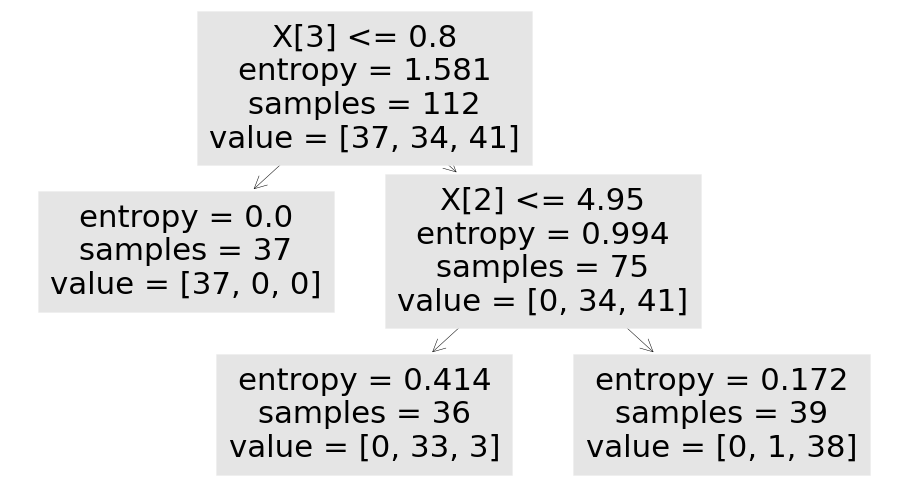

In [5]:
#Visualización
tree.plot_tree(clf)

In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
"""
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
"""

## *Regresión*

In [ ]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])


### Ejemplo Base de datos aleatoria

In [ ]:
# Libreria para regresión
from sklearn.tree import DecisionTreeRegressor


# Creación de base de datos aleatorios
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Modelo para ajuste de regresión
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predicción
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Gráfica de resultados
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Ejemplo Base de datos Boston

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys(), "\n" , boston.feature_names);
Xr= boston.data[:, np.newaxis,5]
yr = boston.target
plt.scatter(Xr,yr);
plt.show();

In [ ]:
#Partcición de datos en Entrenamimento y prueba
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xr, yr, test_size=0.2)

# Entrenamiento del modelo
adr = tree.DecisionTreeRegressor(max_depth=5)

adr.fit(X_train, y_train)

# Validación del modelo
adr.predict(X_test)


In [ ]:
X_grid = np.arange(min(X_test),max(X_test),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_grid, adr.predict(X_grid), color='red', linewidth=3)

## Salidas Multiples

### Ejemplo Base de datos Aleatoria

In [ ]:

# Creación de base de datos aleatoria
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += 0.5 - rng.rand(20, 2)

# Ajuste regresión
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predicción
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Gráfica de resultados
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

## R

### Clasificación

Base de datos Titanic

In [ ]:
"""
####### Arboles de Decisión ####

### Clasificación

#Libreria

library(tidyverse)
library(rpart)
library(rpart.plot)
#library(caret)
library(rattle)

## Importación de base de datos
library(titanic)
data=titanic_train
## Visualización de datos
str(data)

## Realización del modelo

arbol = rpart(
  formula = Survived ~ Sex + Age, 
  data=titanic_train, method = 'class'
  
)

## Graficación 
fancyRpartPlot(arbol)
asRules(arbol)
"""

## Regresión

In [ ]:
"""
Código de R
"""

<right><strong><h1 style="color:#6D21FF;">Ejercicio para el lector</h1></strong></right>
Luego de revisar lo anteriormente descrito, te proponemos realizar el siguiente ejercicio sobre árboles de decisión, estos tendran la solución y su respectiva implementación en phyton, pero antes de revisarla trata de elaborarlos por tu cuenta.

* Se tiene una base de datos con información sobre las enfermedades que tienen algunos pacientes junto con sus edades, el genero y si fuma o consume alcohol, teniendo en cuenta esto, realice (los datos pueden ser descargados del siguiente [Link](https://github.com/rociochavezmx/Rocio-Chavez-youtube-Files/blob/master/Pacientes2.csv).

  1. Cargue los datos en phyton (Utilice la libreria pandas).
  2. Divida los datos en los datos de pureba (Testing) y los datos de entrenamiento (Training).
  3. Cree un árbol de decisión de 4 niveles y entrene el modelo creado.
  4. Cree el gráfico del árbol de decision que generó en el punto anterior.
  5. Obtenga la matriz de confusión con los datoa de prueba (Testing).
  6. Calcule la precision del modelo con base en los valores de la matris de confusión.

Este ejercicio fue adaptado del canal de YouTube Rocio Chavez Ciencia de datos [4]

<right><strong><h1 style="color:#6D21FF;">Solución del ejercicio.</h1></strong></right>

In [ ]:
#Cargando los datos desde el equipo local.
import pandas as pd;
pacientes=pd.read_csv('Pacientes2.csv',engine='python',index_col=0)
#observando los datos
pacientes.head()

In [ ]:
#Separación de las variables predictoras y las variables a predecir.
#variables predictoras.
x=pacientes.iloc[:,1:11]
#variables a predecir.
y=pacientes.iloc[:,0]

In [ ]:
# division de los datos entre datos de prueba y de entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,train_size=0.8, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbol=DecisionTreeClassifier(max_depth=4)#tamaño maximo del árbol de decisión
arbol_p=arbol.fit(x_train,y_train)

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

graf=plt.figure(figsize=(25,20)) #dimensiones del gráfico
tree.plot_tree(arbol_p,feature_names=list(x.columns.values),class_names=list(y.values),filled=True)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred =arbol_p.predict(x_test)
MDC=confusion_matrix(y_test,y_pred)
MDC

In [ ]:
import numpy as np
precision=np.sum(MDC.diagonal())/np.sum(MDC)
precision